(unit5.3)=
# Unit 5.3: Computing Line Spectra

The preparatory reading for this section is [Chapter 7.10](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=247) of  {cite}`karris`.

Follow along at [cpjobling.github.io/eg-150-textbook/fourier_series/3/exp_fs2](https://cpjobling.github.io/eg-150-textbook/fourier_series/3/exp_fs2)

![QR Code for this lecture](pictures/qrcode_unit5_3.png)

This section continues our introduction to Fourier Series.

In the {ref}`unit5.2` we saw that we could exploit the complex exponential $e^{j\omega t}$ to redefine trigonometric Fourier Series into the Exponential Fourier Series and in so doing we eliminate one integration and at the same time simplify the calculation of the coefficients of the Fourier series.

In this section we show how the Exponential form of the Fourier Series leads us to the ability to present waveforms as line spectra which simplifies the calculation of power for systems with harmonics and leads in the limit as $𝑇$ approaches infinity to the Fourier Transform.

## Agenda

* {ref}`fs3:fundamental`
* {ref}`fs3:harmonics`
* {ref}`fs3:line-spectra`
* {ref}`examples18`

(fs3:fundamental)=
## Fundamental frequency

*Fundamental frequency* -- A periodic signal $f(t) = f(t + nT),\; n\in \mathbb{Z}$ has period $T$ s and a fundamental frequency $f_0 = 1/T$ Hz.

When used in Fourier series and Fourier transforms, frequencies are expressed as $\omega$ in radians/second.

The **fundamental frequency** is $\omega = \Omega_0 = 2 \pi f_0$ or, equivalently, $\Omega_0 = 2 \pi /T$ rad/s.

(fs3:harmonics)=
## Harmonic frequencies

*Harmonic frquencies* (or *Harmonics*) are simply integer multiples of the fundamental frequency $\Omega_0$.

* So the zero-th harmonic is $\Omega_0 = 0$ rad/s or DC.

* The first harmonic is $1.\Omega_0 = \Omega_0$,

* The second harmonic is $2 \Omega_0$,

* The third harmonic $3 \Omega_0$ etc.

In general, we can express the $k$-th harmonic as $k\Omega_0,\; k\in \mathbb{Z}$.

(fs3:line-spectra)=
## Line Spectra

The use of line spectra diagrams is a useful way to visualize the harmonic frequency components of a peiodic signal. 

In MATLAB, the easiest way to plot this is using a *stem plot* of the lines, representing the Fourier series (FS) coefficients, plotted against $k$.

### Line Spectra for Exp. FS

When the Exponential Fourier series are known it is useful to plot the amplitude and phase of the harmonics on a frequency scale.

This is the spectrum of the Exponential Fourier Series calculated in {ref}`fs2:matlab` is reproduced in {numref}`fig:5.3.1`

:::{figure-md} fig:5.3.1.
<img src="pictures/efs_sqw.png" alt="Exponential Fourier Series spectrum for a square wave." width="80%">

Exponential Fourier Series spectrum for the square wave calculated in {numref}`fs2:eg`.
:::

### Line Spectra for Trig. FS

If we take the results for the Exponential Fourier Series and gather terms, the amplitudes for the Trig. Fourier Series are given by:

$$a_0 = 2C_0$$

$$a_k = (C_k + C_{-k})$$

$$b_k = j(C_k - C_{-k})$$

Applying this to the previous result we get the spectrum shown in {numref}`fig:tfs`

:::{figure-md} fig:tfs
<img src="pictures/line-spec.png" alt="Trigonometric Fourier series for a square wave" width="80%">

Trigonometric Fourier series for a square wave
:::

(examples18)=
## Examples 18

(ex:18.1)=
### Example 18.1

Compute the exponential Fourier series for the waveform shown below and plot its line spectra.

:::{figure-md} fig:ex:18.1
<img src="pictures/pulse_train.png" alt="" width="80%">


A pulse train
:::

#### Solution

The recurrent rectangular pulse is used extensively in digital communication systems. To determine how faithfully such pulses will be transmitted, it is necessary to know the frequency components.

##### What do we know?

* The pulse duration is $T/w$.
* The recurrence interval $T$ is $w$ times the pulse duration.
* $w$ is the ratio of pulse repetition time to the pulse duration &ndash; normally called the *duty cycle*.

##### Coefficients of the Exponential Fourier Series?

Given

$$C_k = \frac{1}{2\pi}\int_{-\pi/w}^{\pi/w} f(\Omega_0 t)e^{-jk(\Omega_0 t)}\,d(\Omega_0 t)$$

* Is the function **even** or **odd**?
* Does the signal have **half-wave symmetry**?
* What are the cosequencies of symmetry on the form of the coefficients $C_k$?
* What function do we actually need to integrate to compute $C_k$?

We will work through this in class. See {ref}`sol:ex:18.1`.

<pre style="border: 2px solid blue">















</pre>

#### DC Component?

Let $k = 0$ then perform the integral

<pre style="border: 2px solid blue">















</pre>

#### Harmonic coefficients?

Integrate for $k\ne 0$

<pre style="border: 2px solid blue">















</pre>

#### Exponential Fourier Series?

<pre style="border: 2px solid blue">















</pre>

(ex:18.2)=
### Example 18.2:  Effect of pulse width on frequency spectra

let's see what effect the duty cycle $w$ has on the spectra.

Recall pulse width = $T/w$ and plot the complex line spectra for pulse with width $w$ which repeats every $T$ seconds. We will write a MATLAB function `pulse_fs` to simplify the computation.

In [1]:
clearvars
cd ../matlab
format compact

In [2]:
%%file ../matlab/pulse_fs.m
function [f,omega] = pulse_fs(A,w,range)
% PULSE_FS compute fourier series spectrum in range
% -range:range for pulse with 
% height A, period T and width duty cycle w.
omega = -range:range;
for mm = 1:length(omega)
    x = omega(mm)*pi/w;
    if omega(mm) == 0
        f(mm) = A/w;
    else
        f(mm) = (A/w)*sin(x)/(x);
    end
end
return

Created file '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/fourier_series/matlab/pulse_fs.m'.


#### w = 2

$\Omega_0 = 1$ rad/s; $w = 2$; $T = 2\pi$ s; $T/w = \pi$ s.

Compute Fourier Series

In [3]:
A = 1; w = 2;
[f,omega] = pulse_fs(A,w,15);

Plot line Spectrum and add add continuous $\mathrm{sinc}(x)$ envelope.

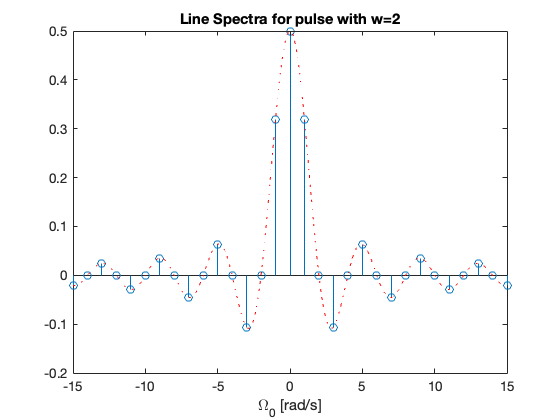

In [4]:
stem(omega,f)
title('Line Spectra for pulse with w=2')
hold on
om = linspace(-15,15,1000);
xlabel('\Omega_0 [rad/s]')
xc = om.*pi./w;

plot(om,(A/w)*sin(xc)./(xc),'r:')
hold off

#### w = 5

$\Omega_0 = 1$ rad/s; $w = 5$; $T = 2\pi$ s; $T/w = \pi$ s.

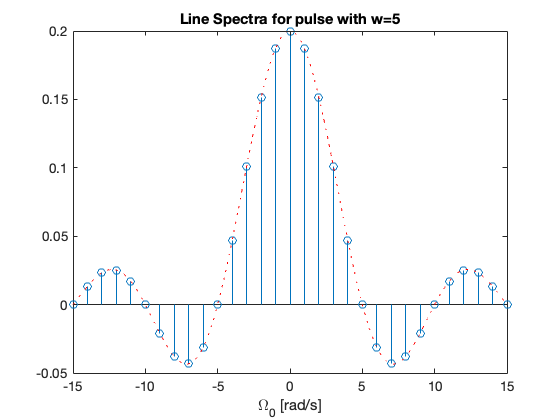

In [5]:
A = 1; w = 5; [f,omega] = pulse_fs(A,w,15);
stem(omega,f)
title('Line Spectra for pulse with w=5')
hold on
om = linspace(-15,15,1000);
xlabel('\Omega_0 [rad/s]')
xc = om.*pi./w;
plot(om,(A/w)*sin(xc)./(xc),'r:')
hold off

#### w = 10

$\Omega_0 = 1$ rad/s; $w = 10$; $T = 2\pi$ s; $T/w = \pi$ s.

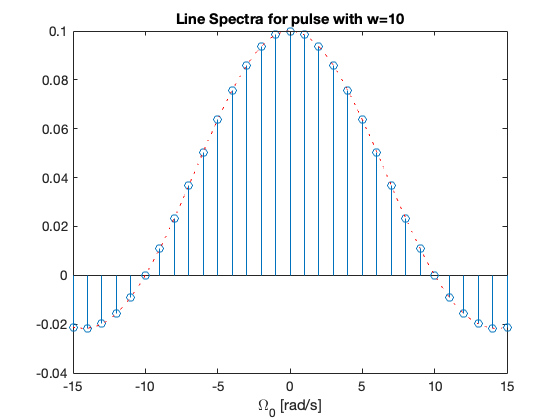

In [6]:
A = 1; w = 10; [f,omega] = pulse_fs(A,w,15);
stem(omega,f)
title('Line Spectra for pulse with w=10')
hold on
om = linspace(-15,15,1000);
xlabel('\Omega_0 [rad/s]')
xc = om.*pi./w;
plot(om,(A/w)*sin(xc)./(xc),'r:')
hold off

#### Implications

* As the width of the pulse **reduces** the width of the freqency spectra needed to fully describe the signal **increases** 
* more bandwidth is needed to transmit the pulse.

**Notes**

You can use the provided MATLAB script [sinc.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/sinc.mlx) to explore these results for yourself. You will also need [pulse_fs.m](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/pulse_fs.m).

The text book ({cite}`karris`) seems to get the wrong results. Karris plots $\sin(wx)/(wx)$ rather than $\sin(x/w)/(x/w)$ in producing the diagrams shown in Figs. 7.36&mdash;7-38.

However, if you view $\sin(wx)/wx$ as in indication of the bandwidth needed to transmit a pulse of width $T/w$ the plots Karris gives make more sense.

### Example 18.3

Use the result of {ref}`ex:18.1` to compute the exponential Fourier series of the impulse train $\delta(t\pm 2\pi k)$ shown in {numref}`

:::{figure-md} fig:ex:18.3
<img src="pictures/impulse_train.png" alt="An impulse train" width="80%">

An impulse train
:::

#### Solution

To solve this we take the previous result and choose amplitude (height) $A$ so that area of pulse is unity. Then we let width go to zero while maintaining the area of unity. This creates a train of impulses $\delta(t\pm 2\pi k)$.

$$C_k  = \frac{1}{2\pi}$$

and, therefore

$$f(t) = \frac{1}{2\pi}\sum_{k=-\infty}^{\infty} \delta(k\Omega_0)$$

Try it!

#### Proof!

From the previous result, 

$$C_n = \frac{A}{w}.\frac{\sin(k\pi/w)}{k\pi/w}$$

and the pulse width was defined as $T/w$, that is

$$\frac{T}{w}=\frac{2\pi}{w}$$

Let us take the previous impulse train as a recurrent pulse with amplitude

$$A = \frac{1}{T/w} = \frac{1}{2\pi/w} = \frac{w}{2\pi}.$$

#### Pulse with unit area

The area of each pulse is then 

$$\frac{2\pi}{w}\times\frac{w}{2\pi} = 1$$

and the pulse train is as shown in {numref}`fig:ex:18.3.1` below:

:::{figure-md} fig:ex:18.3.1
<img src="pictures/unit_area_pulses.png" alt="" width="80%">

Pulse train with unit-area pulses
:::

#### New coefficents

The coefficients of the Exponential Fourier Series are now:
    
$$C_k = \frac{w/2\pi}{w}\frac{\sin(k\pi/w)}{k\pi/w} = \frac{1}{2\pi}\frac{\sin(k\pi/w)}{k\pi/w}$$

and as $\pi/w \to 0$ each recurrent pulse becomes a unit impulse, and the pulse train reduces to a unit impulse train.

Also, recalling that

$$\lim_{x\to 0} \frac{\sin \pi x}{\pi x} = 1$$

the coefficents reduce to

$$C_k = \frac{1}{2\pi}$$

That is all coefficients have the same amplitude and thus

$$f(t) = \frac{1}{2\pi}\sum_{k=-\infty}^{\infty} e^{jk\Omega_0}$$

#### Spectrum of Unit Impulse Train

The line spectrum of a sequence of unit impulses $\delta(t \pm kT)$ is shown in {numref}`fig:ex18.3.2` below:
                                                         
:::{figure-md} fig:ex:18.3.2
<img src="pictures/impulse_spectrum.png" alt="Spectrum of the unit pulse train" width="80%">

Spectrum of the unit pulse train
:::

#### Another Interesting Result

Consider the pulse train again:

:::{figure-md} fig:ex:18.3.3
<img src="pictures/pulse_train.png" alt="Pulse train signal" width="80%">

Pulse train signal
:::

What happens when the pulses to the left and right of the centre pulse become less and less frequent? That is what happens when $T \to \infty$?

#### Well?

* As $T\to \infty$ the fundamental frequency $\Omega_0 \to 0$
* We are then left with just one pulse centred around $t=0$.
* The frequency difference between harmonics also becomes smaller.
* The line spectrum becomes a continous function in frequency.

This result is the basis of the *Fourier Transform* which is coming in **EG-247: Digital Signal Processing** next year.

## Summary

* {ref}`fs3:fundamental`
* {ref}`fs3:harmonics`
* {ref}`fs3:line-spectra`
* {ref}`examples18`

(unit5.3:takeaways)=
### Unit 5.3: Takeways

The exponential and trigonometric Fourier series coefficients can be plotted as lines on the frequency axis.

These line-spectra are useful for reasoning about the frequency components that are present in a periodic signal.

This is useful for e.g. computing the bandwidth needed on a medium that is to transmit a signal without loss.

We will see next, that we can also use these line spectra to compute power in a signal, the total harmonic distortion present in a signal, and in the design of filters.

## Next Time

We move on to consider 

* {ref}`unit5.4`

## References

```{bibliography}
:filter: docname in docnames
```

(sol:ex:18.1)=
## Solution to Example 18.1

Given

$$C_k = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(t)e^{-jk(\Omega_0 t)}\,d(\Omega_0 t)$$

* Is the function **even** or **odd**? **even** $f(t) = f(-t)$!
* Does the signal have **half-wave symmetry**? No!
* What are the cosequencies of symmetry on the form of the coefficients $C_k$? $C_k$ will be real values. Trig. equivalent no sine terms.
* What function do we actually need to integrate to compute $C_k$? We only need to integrate between the limits $-\pi/w \to \pi/w$

$$C_k = \frac{1}{2\pi}\int_{-\pi/w}^{\pi/w} Ae^{-jk(\Omega_0 t)}\,d(\Omega_0 t) = \frac{A}{2\pi}\int_{-\pi/w}^{\pi/w} e^{-jk(\Omega_0 t)}\,d(\Omega_0 t) $$

### Solution: DC component!

$$C_0 = \left.\frac{A}{2\pi}\,\Omega_0 t\,\right|_{-\pi/w}^{\pi/w} = \frac{A}{2\pi}\left(\frac{\pi}{w}+\frac{\pi}{w}\right)$$

or

$$C_0 = \frac{A}{w}$$

### Harmonic coefficients!

$$C_k = \left.\frac{A}{-jk2\pi}\,e^{-jk(\omega t)}\,\right|_{-\pi/w}^{\pi/w} = \frac{A}{k\pi}\left(\frac{e^{jk\pi/w}-e^{-jk\pi/w}}{j2}\right) = \frac{A}{k\pi}\sin\left(\frac{k\pi}{w}\right)$$

$$C_k = \frac{A}{w}\frac{sin\left(k\pi/w\right)}{k\pi/w}$$

### Exponential Fourier Series!

$$f(t)=\sum_{k=-\infty}^{\infty}\;\frac{A}{w}\,\frac{\sin\left(k\pi/w\right)}{k\pi/w} e^{-k\Omega_0 t}$$